# Combining models

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uns
from uns import training

In [129]:
models = ('701', '801', '901')
# assume that all of the model have the same set
indices = np.where(training['model_'+models[0]] == 'validate')[0]
outputfiles = {model:uns.uns_files('validate','predictions',model) for model in models}

In [56]:
def plot_prob(ax, filename, mask=False):
    p = np.load(filename)
    if mask:
        ax[1].imshow(p[1,:,:], vmin=0, vmax=1, cmap=plt.cm.gray)
    else:
        ax = [ax]
    ax[0].imshow(p[0,:,:], vmin=0, vmax=1, cmap=plt.cm.inferno)
    for a in ax:
        a.axis('equal')
        a.axis('off')
        a.tick_params(which='both', axis='both',
                       bottom=False, top=False, left=False, right=False,
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        a.autoscale(tight=True)

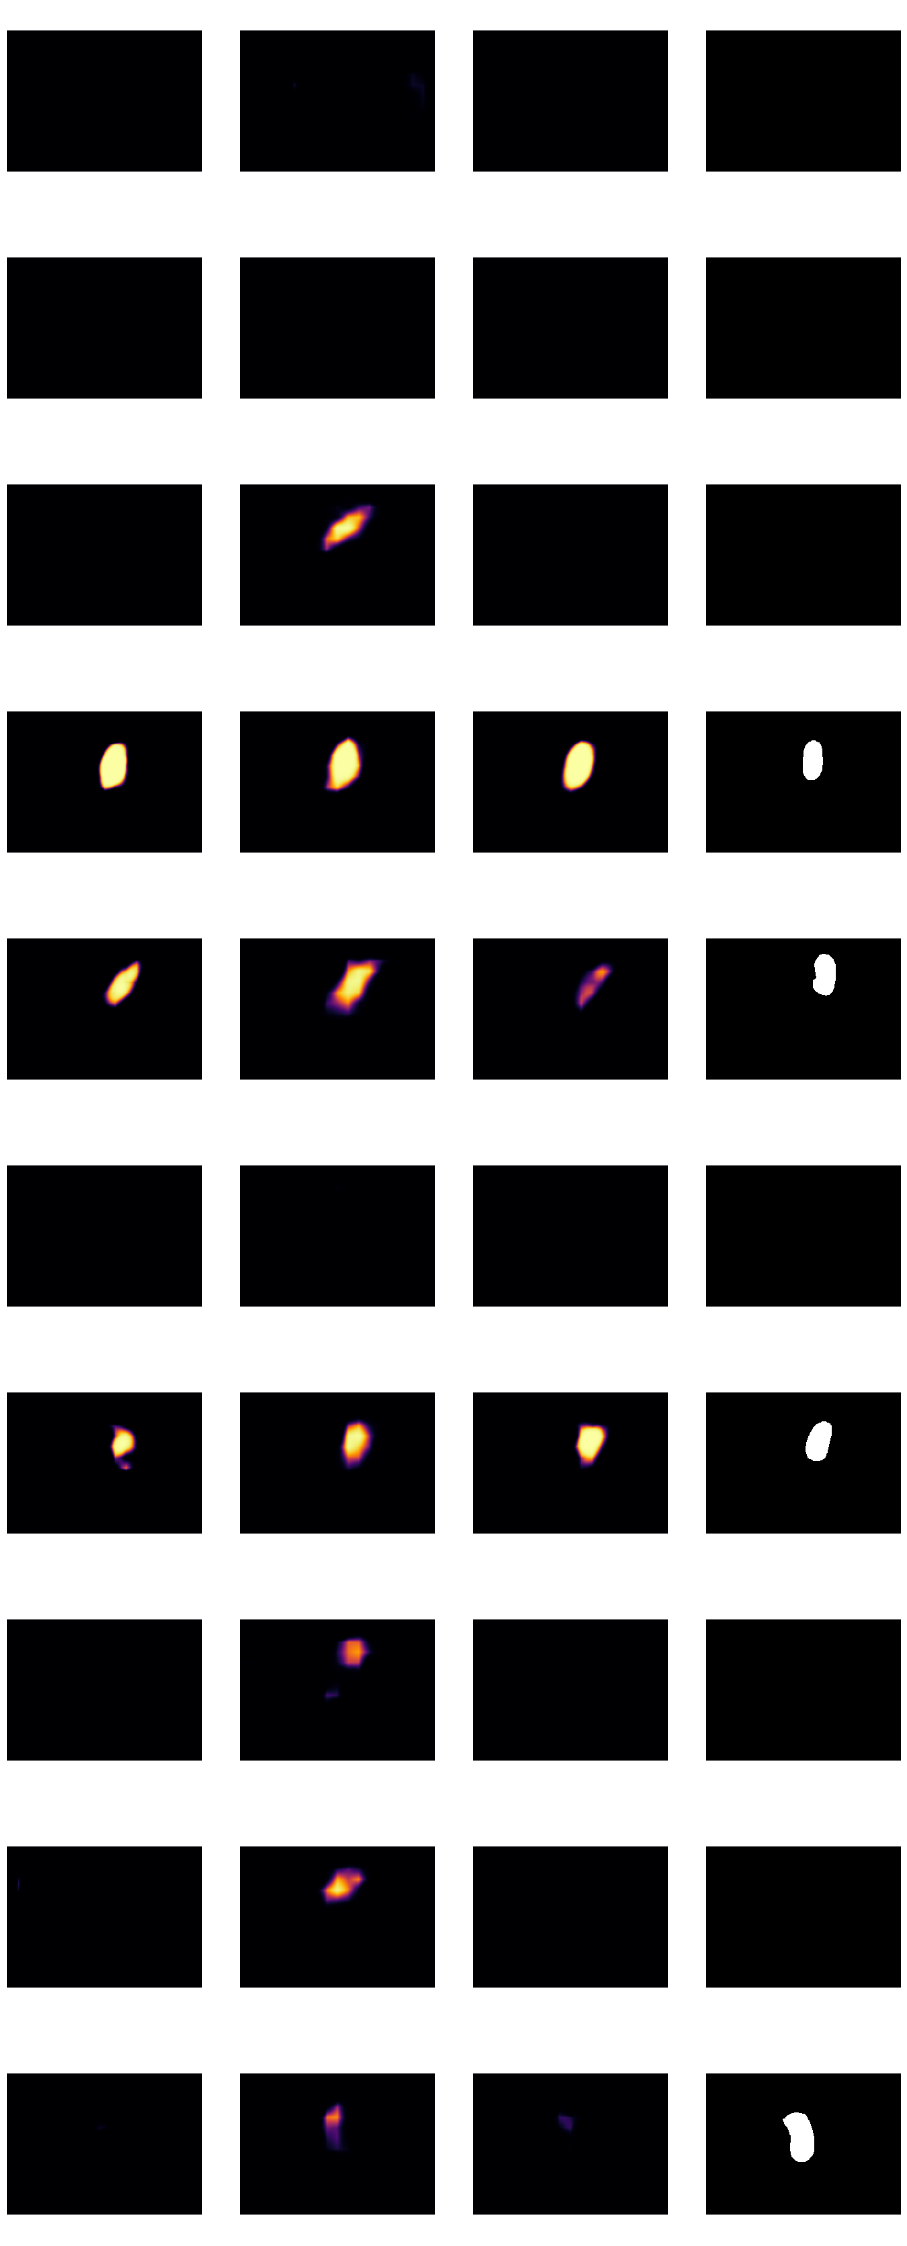

In [57]:
N = 10
fig, ax = plt.subplots(N,len(models)+1, figsize=(16,40))
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
for j,jdx in enumerate(subset):
    for i,m in enumerate(models):
        if i==0:
            plot_prob([ax[j,i], ax[j,-1]], outputfiles[m][jdx], mask=True)
        else:
            plot_prob(ax[j,i], outputfiles[m][jdx])
# make        

In [71]:
N = 100
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
for j,jdx in enumerate(subset):
    for i,m in enumerate(models):
        p = np.load(outputfiles[m][jdx])
        # calculate expected area (sum probability)
        if i == 0:
            size = np.prod(p[0].shape)
            print('{:04d}: {:5.3f}'.format(jdx, np.sum(p[1])/size), end='|')
        print('{:5.3f}'.format(np.sum(p[0])/size), end='|')
    print()

0433: 0.000|0.000|0.003|0.000|
0329: 0.043|0.031|0.048|0.007|
0603: 0.031|0.032|0.044|0.041|
0310: 0.000|0.000|0.004|0.000|
0873: 0.000|0.000|0.000|0.000|
0901: 0.000|0.000|0.000|0.000|
0191: 0.000|0.019|0.035|0.021|
0247: 0.000|0.000|0.016|0.000|
0120: 0.035|0.000|0.005|0.020|
0268: 0.000|0.000|0.000|0.000|
0471: 0.000|0.000|0.010|0.009|
0056: 0.029|0.002|0.022|0.000|
0034: 0.033|0.000|0.011|0.000|
0906: 0.000|0.000|0.000|0.000|
0663: 0.034|0.000|0.031|0.000|
0687: 0.024|0.017|0.044|0.009|
0914: 0.000|0.000|0.020|0.000|
0359: 0.000|0.000|0.011|0.000|
0047: 0.033|0.000|0.015|0.024|
0330: 0.000|0.000|0.016|0.000|
0535: 0.031|0.029|0.060|0.027|
0358: 0.044|0.040|0.058|0.036|
0416: 0.046|0.008|0.001|0.000|
0150: 0.032|0.000|0.028|0.000|
0632: 0.034|0.040|0.045|0.039|
0835: 0.000|0.020|0.027|0.022|
0353: 0.000|0.020|0.047|0.001|
0870: 0.000|0.000|0.013|0.004|
0151: 0.030|0.000|0.030|0.000|
0400: 0.000|0.000|0.000|0.000|
0059: 0.038|0.000|0.026|0.000|
0271: 0.000|0.000|0.013|0.000|
0486: 0.

(-0.0005, 0.1)

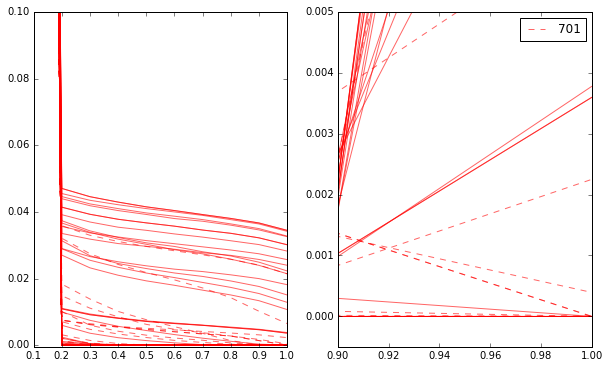

In [99]:
N = 100
fig, ax = plt.subplots(1,2, figsize=(10,6))
col = ('b','g','r')
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
leg=None
for j,jdx in enumerate(subset):
    for i,m in enumerate(('701',),2):
        p = np.load(outputfiles[m][jdx])
        hist = np.histogram(p[0],np.linspace(0,1,11))
        size = np.prod(p[0].shape)
        if np.sum(p[1]) > 0:
            ls = '-' + col[i]
        else:
            ls = '--' + col[i]
        if j==(len(subset)-1):
            leg = m
            
        ax[0].plot(hist[1][1:], np.cumsum(hist[0][::-1])[::-1]/size, ls, alpha=0.6)
        ax[1].plot(hist[1][2:], hist[0][1:]/size, ls, alpha=0.6, label=leg)
        
        #print('{:04d}: {:5.3f}'.format(jdx, np.sum(p[1])/size), end='|')
        #print('{:5.3f}'.format(np.sum(p[0])/size), end='|')
ax[1].legend() 
ax[1].set_xlim(0.9,1.0)
ax[1].set_ylim(-0.0005,0.005)

ax[0].set_ylim(-0.0005,0.1)

In [130]:
# Add new columns:
bins = np.linspace(0,1,11)
for m in models:
    for i in bins[1:]:
        columnname = 'model_{:s}_hist_{:03d}'.format(m,int(i*100))
        training[columnname] = 0
print(training.columns)

Index(['centcol', 'centrow', 'contH', 'contW', 'contour', 'contxmax',
       'contxmin', 'contymax', 'contymin', 'hasmask',
       ...
       'model_801_hist_090', 'model_901_hist_010', 'model_901_hist_020',
       'model_901_hist_030', 'model_901_hist_040', 'model_901_hist_050',
       'model_901_hist_060', 'model_901_hist_070', 'model_901_hist_080',
       'model_901_hist_090'],
      dtype='object', length=102)


In [131]:
for j,jdx in enumerate(indices):
    for i,m in enumerate(models):
        p = np.load(outputfiles[m][j])
        hist = np.histogram(p[0],np.linspace(0,1,11))
        size = np.prod(p[0].shape)
        for h,b in zip(hist[0],hist[1][1:]):
            columnname = 'model_{:s}_hist_{:03d}'.format(m,int(b*100))
            colnum = training.columns.get_loc(columnname)
            training.iloc[jdx, colnum] = h

In [132]:
training.to_msgpack('training.bin')

In [144]:
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
# list of columns:
bins = np.linspace(0,1,11)
columns = []
for m in models:
    for i in bins[1:]:
        columns.append('model_{:s}_hist_{:03d}'.format(m,int(i*100)))


In [205]:
X = training.ix[indices,columns].values/size
X.shape

(958, 30)

In [245]:
y = training.ix[indices,'hasmask'].values
clf = svm.LinearSVC()
clf.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [246]:
y_pred = clf.predict(X)
classif_rate = np.mean(y_pred == y) * 100
classif_rate

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred, labels=[True, False])
print(cm)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

# estimate dice score based on confusion matrix:
(cm_norm[0,0]*.73 + cm_norm[1,1])/2

[[272 172]
 [ 67 447]]
[[ 0.61261261  0.38738739]
 [ 0.13035019  0.86964981]]


0.65842850632733896

In [206]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
#X = data.values
Xp = RobustScaler().fit_transform(X)
P = pca.fit(Xp)
pca.explained_variance_ratio_

array([ 0.76794321,  0.07520283,  0.06324779,  0.04271652,  0.02111368,
        0.00933579,  0.00401818,  0.00389358,  0.00319006])

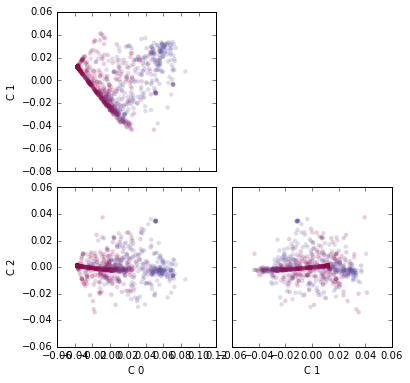

In [211]:
pft = P.fit_transform(X)
uns.plot_pca_comps(pft, 3, 
                   alpha=0.2, 
                   edgecolors='none', 
                   color=y,
                   cmap=plt.cm.Spectral)